In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Preparation

In [ ]:
df1=pd.read_excel("SF SPARES  CONSUMPTION FROM FEB 25 TO MAY 25.xlsx")

In [ ]:
df1.head()

,Sold-To Party,Billing Date,MONTH,Name,Material,Material Description,Billed Quantity,Plant,Division
0,FCEG0018,2025-02-01,2025-02-01,E-Galaxy,GSCFECX00001,WH SPARE- MFV PURO PLUS 10-50L,2,2758,48
1,FCEG0018,2025-02-01,2025-02-01,E-Galaxy,GSAHNP301600,WH SPARE -16A 30mA PRCD Plug,3,2758,48
2,FCEG0018,2025-02-01,2025-02-01,E-Galaxy,GSSGVX0056,PT Main PCB ( New Screw Type),1,2758,47
3,FCEG0018,2025-02-01,2025-02-01,E-Galaxy,GSSGVX0087,ET MAIN PCB ( New Screw Type),1,2758,47
4,FCEG0018,2025-02-01,2025-02-01,E-Galaxy,GSSGVX0159,INDC. COOKTOP RT QT MAIN PCB,1,2758,47


In [ ]:
df2=pd.read_excel("Spares consumption from march 23 to jan 25.xlsx")

In [ ]:
df2.head()

,Sold-To Party,Billing Date,MONTH,Name,Material,Material Description,Billed Quantity,Plant,Division
0,FCAS0587,2023-03-03,2023-03-01 00:00:00,AS Enterprise,GSCSMYC00001,WH SPARE-H.T ELEMENT2KW VERT PURO+ 15-50,1,2746,48
1,FCAS0587,2023-03-03,2023-03-01 00:00:00,AS Enterprise,GSSGEX0409,GENIE MIXR MOTOR GREY/ GREEN,1,2746,47
2,FCAS0587,2023-03-03,2023-03-01 00:00:00,AS Enterprise,GSSGSX0082,CRISP POPUP TOSTR BLK STOVE,1,2746,47
3,FCAS0587,2023-03-03,2023-03-01 00:00:00,AS Enterprise,GSSPGX0105,MULTIS TYLING HC4045 STRATNR WAVE PLAT H,2,2746,46
4,FCAS0587,2023-03-03,2023-03-01 00:00:00,AS Enterprise,GSCALCGEX005,Al. Teeth Plate Coupler_Hexo,1,2746,47


In [ ]:
df2.isnull().sum()

Sold-To Party           0
Billing Date            0
MONTH                   0
Name                    0
Material                0
Material Description    0
Billed Quantity         0
Plant                   0
Division                0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54898 entries, 0 to 54897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Sold-To Party         54898 non-null  object        
 1   Billing Date          54898 non-null  datetime64[ns]
 2   MONTH                 54898 non-null  object        
 3   Name                  54898 non-null  object        
 4   Material              54898 non-null  object        
 5   Material Description  54898 non-null  object        
 6   Billed Quantity       54898 non-null  int64         
 7   Plant                 54898 non-null  int64         
 8   Division              54898 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ MB


In [ ]:
df2['MONTH'].unique()

array([datetime.datetime(2023, 3, 1, 0, 0),
       datetime.datetime(2023, 4, 1, 0, 0), 'MAY-23', 'JUNE-23',
       'JULY-23', 'AUGUST-23', 'SEP-23', 'OCT-23', 'NOV-23', 'DEC-23',
       'JAN-24', 'FEB-24', 'APRIL-24', 'MAY-24', 'MARCH-24', 'JUNE-24',
       'JULY-24', 'AUG-24', 'SEP-24', 'OCT24', 'NOV-24', 'DEC-24',
       'JAN-25'], dtype=object)

In [ ]:
df1['MONTH'].unique()

<DatetimeArray>
['2025-02-01 00:00:00', '2025-03-01 00:00:00', '2025-04-01 00:00:00',
 '2025-05-01 00:00:00']
Length: 4, dtype: datetime64[ns]

In [ ]:
df_def=pd.concat([df1,df2],axis=0)

In [ ]:
df_def.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71683 entries, 0 to 54897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Sold-To Party         71683 non-null  object        
 1   Billing Date          71683 non-null  datetime64[ns]
 2   MONTH                 71683 non-null  object        
 3   Name                  71683 non-null  object        
 4   Material              71683 non-null  object        
 5   Material Description  71683 non-null  object        
 6   Billed Quantity       71683 non-null  int64         
 7   Plant                 71683 non-null  int64         
 8   Division              71683 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 5.5+ MB


In [ ]:
df_def=df_def.drop(columns=['MONTH'])

In [ ]:
df_def['Billing Date'].unique()

<DatetimeArray>
['2025-02-01 00:00:00', '2025-02-03 00:00:00', '2025-02-04 00:00:00',
 '2025-02-05 00:00:00', '2025-02-06 00:00:00', '2025-02-07 00:00:00',
 '2025-02-08 00:00:00', '2025-02-10 00:00:00', '2025-02-11 00:00:00',
 '2025-02-12 00:00:00',
 ...
 '2025-01-20 00:00:00', '2025-01-22 00:00:00', '2025-01-23 00:00:00',
 '2025-01-24 00:00:00', '2025-01-25 00:00:00', '2025-01-27 00:00:00',
 '2025-01-28 00:00:00', '2025-01-29 00:00:00', '2025-01-30 00:00:00',
 '2025-01-31 00:00:00']
Length: 512, dtype: datetime64[ns]

In [ ]:
df_def['Billing Date']=pd.to_datetime(df_def['Billing Date'])

In [ ]:
df_def.insert(column='billing year',loc=2,value=df_def['Billing Date'].dt.year)

In [ ]:
df_def.insert(column='billing month',loc=3,value=df_def['Billing Date'].dt.month)

In [ ]:
df_def.head()

,Sold-To Party,Billing Date,billing year,billing month,Name,Material,Material Description,Billed Quantity,Plant,Division
0,FCEG0018,2025-02-01,2025,2,E-Galaxy,GSCFECX00001,WH SPARE- MFV PURO PLUS 10-50L,2,2758,48
1,FCEG0018,2025-02-01,2025,2,E-Galaxy,GSAHNP301600,WH SPARE -16A 30mA PRCD Plug,3,2758,48
2,FCEG0018,2025-02-01,2025,2,E-Galaxy,GSSGVX0056,PT Main PCB ( New Screw Type),1,2758,47
3,FCEG0018,2025-02-01,2025,2,E-Galaxy,GSSGVX0087,ET MAIN PCB ( New Screw Type),1,2758,47
4,FCEG0018,2025-02-01,2025,2,E-Galaxy,GSSGVX0159,INDC. COOKTOP RT QT MAIN PCB,1,2758,47


In [ ]:
df_def1=df_def[['Material','Material Description','Billed Quantity','Division']]
df_frq=df_def1.groupby(['Material','Material Description'])['Billed Quantity'].count().reset_index()

In [ ]:
df_frq.rename(columns={'Billed Quantity':'invoice count'},inplace=True)

In [ ]:
df_frq['invoice count'].value_counts()

invoice count
1      1066
2       471
3       293
4       177
5       129
       ... 
349       1
327       1
250       1
768       1
166       1
Name: count, Length: 214, dtype: int64

In [ ]:
df_frq.head()

,Material,Material Description,invoice count
0,ACABXXW000,Buzzer - 2M(Ath),1
1,ACAKPXW063,6A 3 Pin Shuttered Socket ISI(Ath),1
2,ACAMBIW100,10 A Mega Bell Push Indicator Athena,1
3,ACARFHW005,High speed FR Athena Chalk White,1
4,ACASEXW001,30 A EKT sensor based 2M(Ath),2


In [ ]:
df_reg=df_def1.groupby(['Material','Material Description'])['Billed Quantity'].sum().reset_index()

In [ ]:
# Current stock data
df_stk=pd.read_excel("2758 STOCK AS ON 06.06.25.xlsx")

In [ ]:
df_stk.head()

,DIVISION,Material,Material Description,Batch,Unrestricted,Storage,Plant,IN Transit
0,10,IHAFS5108C08S,0.8K 65kA FP EH I1 C U S 220 ACB,FG-IP-SBD,1,F010,2758,0
1,10,IHAFE2112000S,1.2K 50kA FP I1 MH ACB,FG-IP-SBD,1,F625,2758,0
2,10,ISCFX0006,1000 Amps Moving Blade Contact FP C/O,SPR-IP-FRD,1,F006,2758,0
3,10,ISCFX0001,200 Amps Moving Blade Contact FP C/O,SPR-IP-FRD,3,F006,2758,0
4,10,IHLLSFC30320,320A 3P 50/50kA TAMA L Fr. MCCB,FG-IP-SBD,1,F625,2758,0


In [ ]:
df_stk.drop(columns=['Batch','Storage','Plant'],inplace=True)

In [ ]:
df=pd.merge(pd.merge(df_reg,df_frq,on='Material',how='outer'),df_stk,on='Material',how='outer')

In [ ]:
df.head()

,Material,Material Description_x,Billed Quantity,Material Description_y,invoice count,DIVISION,Material Description,Unrestricted,IN Transit
0,ACABXXW000,Buzzer - 2M(Ath),2.0,Buzzer - 2M(Ath),1.0,NaN,NaN,NaN,NaN
1,ACAIPIG060,NaN,NaN,NaN,NaN,30.0,Indicator Lamp( Misty),160.0,0.0
2,ACAKCXG063,NaN,NaN,NaN,NaN,30.0,6/16 A 3Pin Shuttered Socket ISI(Misty),59.0,0.0
3,ACAKGXG002,NaN,NaN,NaN,NaN,30.0,USB Charger 2.1 A Single Port( Misty),17.0,0.0
4,ACAKHWG000,NaN,NaN,NaN,NaN,30.0,Tel Socket 1M( Misty),63.0,0.0


In [ ]:
df['Material Description_x'].fillna(df['Material Description_y'],inplace=True)

In [ ]:
df['Material Description_y'].fillna(df['Material Description_x'],inplace=True)

In [ ]:
#df['Division'].fillna(df['DIVISION'],inplace=True)

In [ ]:
#df['DIVISION'].fillna(df['Division'],inplace=True)

In [ ]:
df['Unrestricted'].fillna(0,inplace=True)

In [ ]:
df['IN Transit'].fillna(0,inplace=True)

In [ ]:
df['Billed Quantity'].fillna(0,inplace=True)

In [ ]:
#df['Name'].fillna('notsold',inplace=True)

In [ ]:
#df['Billing Date'].fillna('2025-01-00',inplace=True)

In [ ]:
#df['Billing Date'].fillna('2025-01-00',inplace=True)

In [ ]:
#df['billing year'].fillna('0000.0',inplace=True)

In [ ]:
#df['billing month'].fillna('0.0',inplace=True)

In [ ]:
#df['Sold-To Party'].fillna('notsold',inplace=True)
#df['Plant'].fillna('2758',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8583 entries, 0 to 8582
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Material                8583 non-null   object 
 1   Material Description_x  3999 non-null   object 
 2   Billed Quantity         8583 non-null   float64
 3   Material Description_y  3999 non-null   object 
 4   invoice count           3999 non-null   float64
 5   DIVISION                8063 non-null   float64
 6   Material Description    8063 non-null   object 
 7   Unrestricted            8583 non-null   float64
 8   IN Transit              8583 non-null   float64
dtypes: float64(5), object(4)
memory usage: 603.6+ KB


In [ ]:
df.isnull().sum()

Material                     0
Material Description_x    4584
Billed Quantity              0
Material Description_y    4584
invoice count             4584
DIVISION                   520
Material Description       520
Unrestricted                 0
IN Transit                   0
dtype: int64

In [ ]:
df['Material Description_x'].fillna(df['Material Description'],inplace=True)
df['Material Description_y'].fillna(df['Material Description'],inplace=True)
df['invoice count'].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

Material                    0
Material Description_x      0
Billed Quantity             0
Material Description_y      0
invoice count               0
DIVISION                  520
Material Description      520
Unrestricted                0
IN Transit                  0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.duplicated().sum()

25

In [ ]:
df=df.drop_duplicates(keep='first')

## Feature Engineering and Extraction

In [ ]:
df['Available stock']=df['Unrestricted']+df['IN Transit']

In [ ]:
df.drop(columns=['Material Description_x','DIVISION','Material Description_y','Unrestricted','IN Transit'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8038 entries, 1 to 8582
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Material              8038 non-null   object 
 1   Billed Quantity       8038 non-null   float64
 2   invoice count         8038 non-null   float64
 3   Material Description  8038 non-null   object 
 4   Available stock       8038 non-null   float64
dtypes: float64(3), object(2)
memory usage: 376.8+ KB


In [ ]:
#df['Billing Date']=pd.to_datetime(df['Billing Date']).dt.date

In [ ]:
df.head()

,Material,Billed Quantity,invoice count,Material Description,Available stock
1,ACAIPIG060,0.0,0.0,Indicator Lamp( Misty),160.0
2,ACAKCXG063,0.0,0.0,6/16 A 3Pin Shuttered Socket ISI(Misty),59.0
3,ACAKGXG002,0.0,0.0,USB Charger 2.1 A Single Port( Misty),17.0
4,ACAKHWG000,0.0,0.0,Tel Socket 1M( Misty),63.0
5,ACAKHWG000,0.0,0.0,Tel Socket 1M( Misty),5.0


In [ ]:
#data_frequency=df.groupby(['Material','Material Description'])['Billing Date'].count().sort_values(ascending=False).reset_index()

In [ ]:
#dt=df.copy()
#dt=dt.loc[:,['Material','Material Description','Available stock']]
# since due to merge the 'Available stock' column is already having the total stock value for the materials so instead of group by we remove duplicates
#data_stock=dt.drop_duplicates(subset='Material').sort_values(by='Available stock',ascending=False)

In [ ]:
#data_regency=df.groupby(['Material','Material Description'])['Billed Quantity'].sum().sort_values(ascending=False).reset_index()
#data_regency.head()

,Material,Material Description,Billed Quantity
0,FSCCPAFSX310,20 WINDSTROM P/FAN MOTOR ( quality ),13747
1,FSCELILX0034,CAPACITOR 2.25 MFD 14 STRANDS SP.,10986
2,FSCELILX0034,CAPACITORÂ 2.25 MFD 14 STRANDS SP.,7888
3,FSCELILX0036,CAPACITOR 2.25MFD 14STRANDS 500 VAC SP,6297
4,FSSFCX0966,STATOR ASY 12X12X13CRNO125 S.DIA 8.1 SP.,4179


In [ ]:
#dm.rename(columns={'Material Description_x':'Material Description','Billing Date':'Billing count'},inplace=True)

In [ ]:
df['invoice count'].value_counts()

invoice count
0.0      4568
1.0       943
2.0       444
3.0       296
4.0       189
         ... 
273.0       1
70.0        1
185.0       1
433.0       1
166.0       1
Name: count, Length: 213, dtype: int64

In [ ]:
df['Billed Quantity'].value_counts()

Billed Quantity
0.0       4568
1.0        718
2.0        379
3.0        238
4.0        212
          ... 
474.0        1
1169.0       1
148.0        1
269.0        1
249.0        1
Name: count, Length: 273, dtype: int64

## EDA

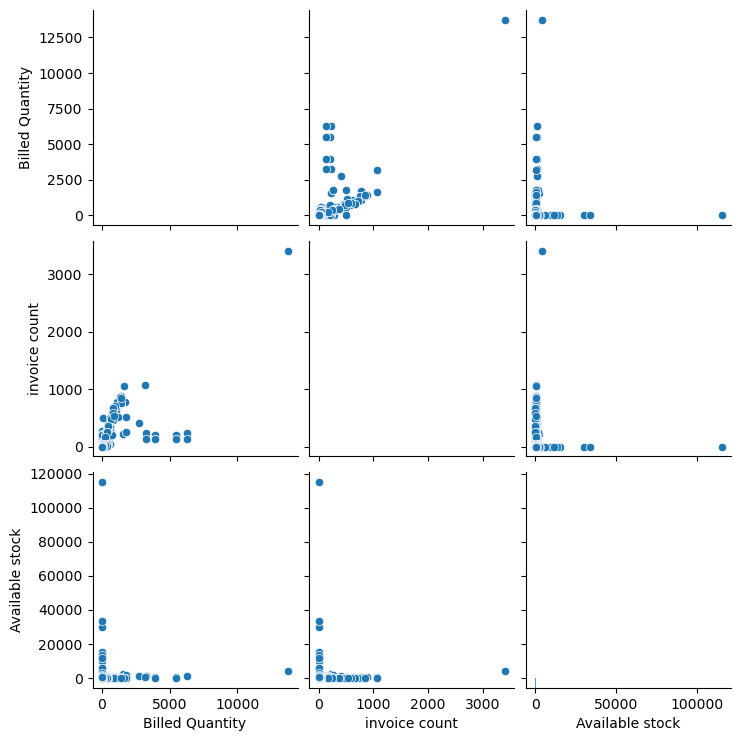

In [ ]:
# pairplot to visualize relationships
sns.pairplot(df)
plt.show()

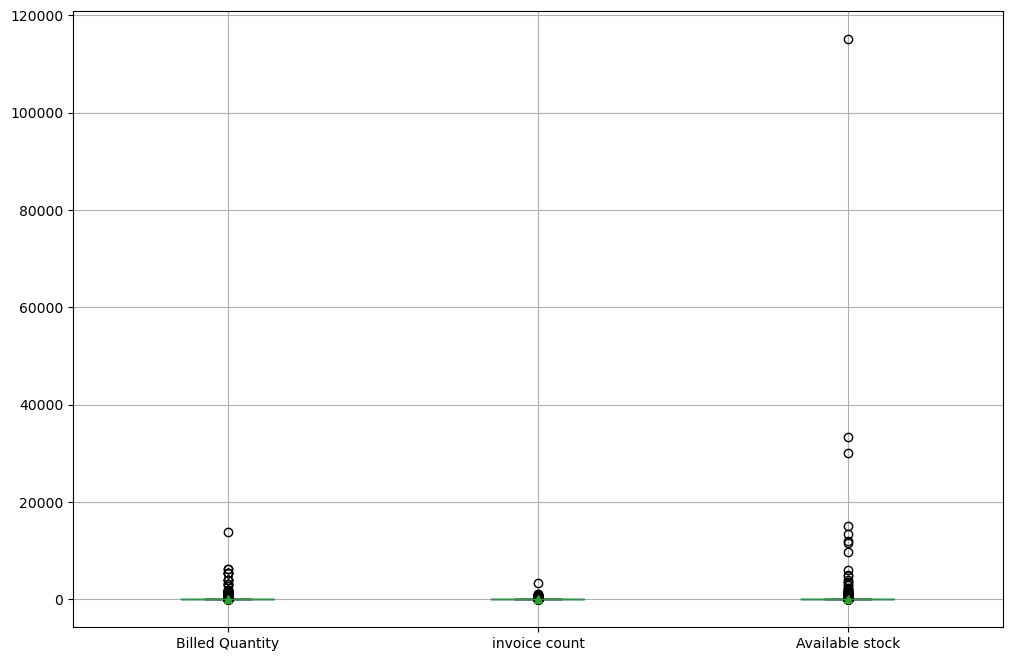

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
df.boxplot(ax=ax,showmeans=True)
plt.show()

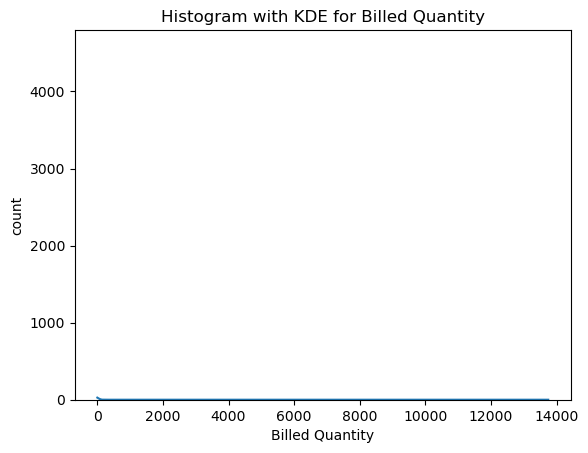

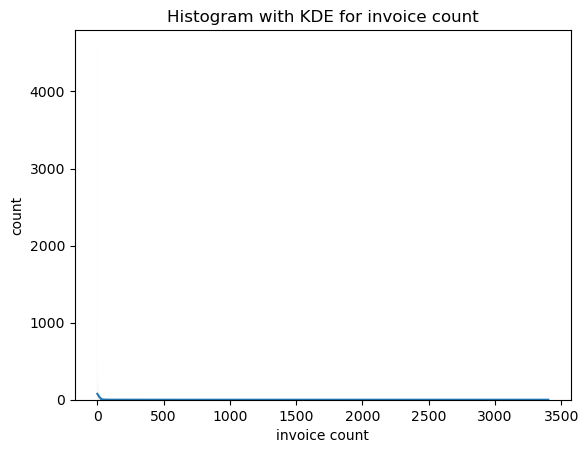

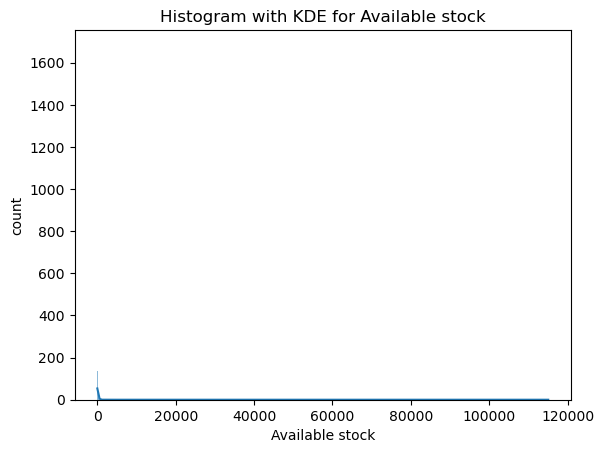

In [ ]:
for col in df.columns:
    if df[col].dtypes!='object':
        sns.histplot(df[col],kde=True)
        plt.xlabel(col)
        plt.ylabel('count')
        plt.title(f'Histogram with KDE for {col}')
        plt.show()

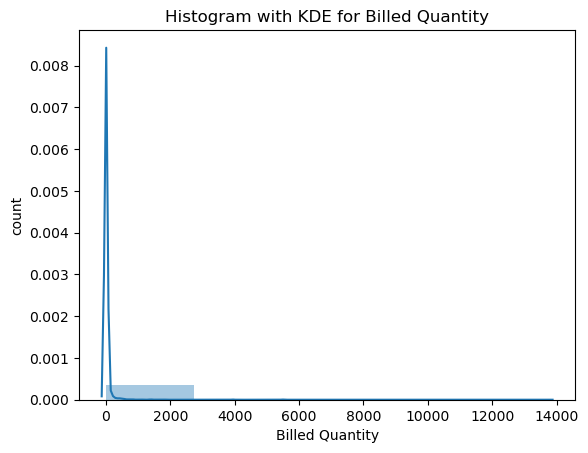

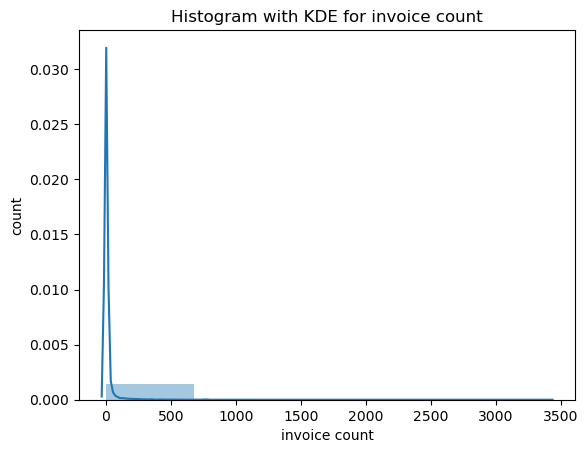

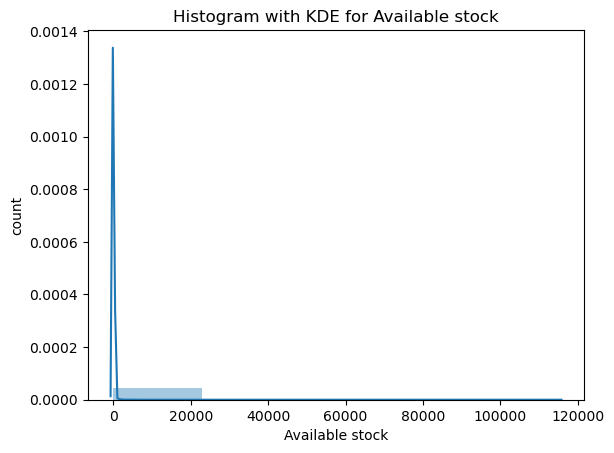

In [ ]:
for col in df.columns:
    if df[col].dtypes!='object':
        sns.distplot(df[col],bins=5,kde=True)
        plt.xlabel(col)
        plt.ylabel('count')
        plt.title(f'Histogram with KDE for {col}')
        plt.show()

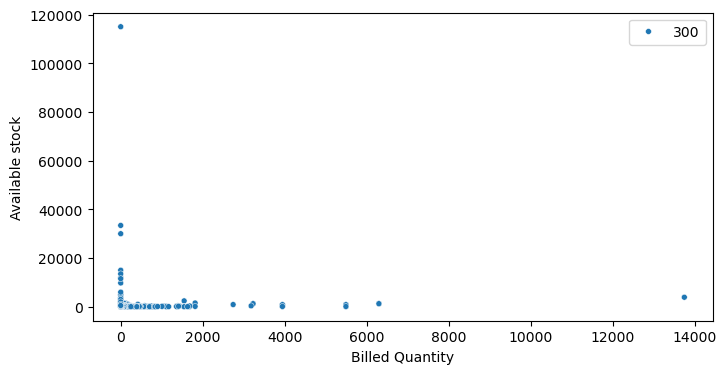

In [ ]:
fig=plt.figure(figsize=(8,4))
sns.scatterplot(x='Billed Quantity',y='Available stock',data=df,size=300)
plt.show()

In [ ]:
Q1=df['Billed Quantity'].quantile(0.01)
Q3=df['Billed Quantity'].quantile(0.99)
IQR=Q3-Q1

outliers=df[(df['Billed Quantity']<(Q1-1.5*IQR))|(df['Billed Quantity']>(Q3+1.5*IQR))]
len(outliers)

31

In [ ]:
df=df[~((df['Billed Quantity']<(Q1-1.5*IQR))|(df['Billed Quantity']>(Q3+1.5*IQR)))]

In [ ]:
Q1=df['invoice count'].quantile(0.01)
Q3=df['invoice count'].quantile(0.99)
IQR=Q3-Q1

df=df[~(df['invoice count']<(Q1-1.5*IQR))|(df['invoice count']>(Q3+1.5*IQR)).any()]

In [ ]:
Q1=df['Available stock'].quantile(0.01)
Q3=df['Available stock'].quantile(0.99)
IQR=Q3-Q1

df=df[~(df['Available stock']<(Q1-1.5*IQR))|(df['Available stock']>(Q3+1.5*IQR))]

In [ ]:
df.shape

(8007, 5)

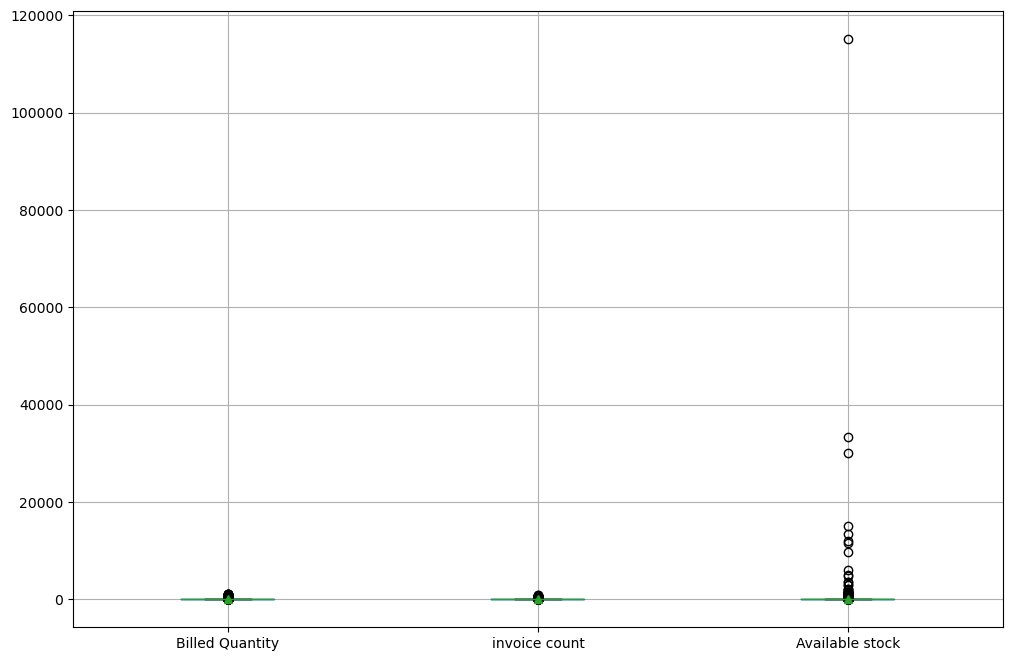

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
df.boxplot(ax=ax,showmeans=True)
plt.show()

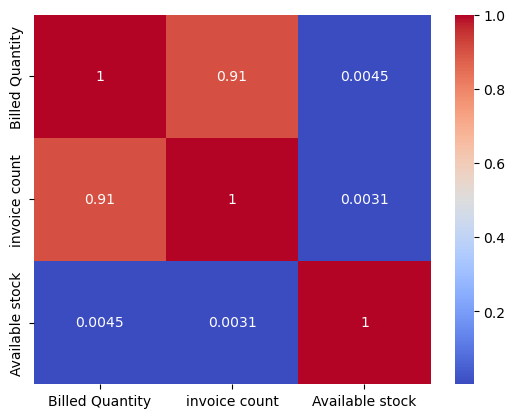

In [ ]:
# correlation matrix
sns.heatmap(df[['Billed Quantity','invoice count','Available stock']].corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
df_c=df.copy()
df_c.drop(columns=['Material','Material Description','Available stock'],inplace=True)
df_c.head()

,Billed Quantity,invoice count
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0


In [ ]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
df_scaled=scaling.fit_transform(df_c)

In [ ]:
df_c.columns

Index(['Billed Quantity', 'invoice count'], dtype='object')

In [ ]:
df_df1=pd.DataFrame(df_scaled,columns=['invoice count', 'Billed Quantity'])
df_df1.head()

,invoice count,Billed Quantity
0,-0.228109,-0.220437
1,-0.228109,-0.220437
2,-0.228109,-0.220437
3,-0.228109,-0.220437
4,-0.228109,-0.220437


## KMeans


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

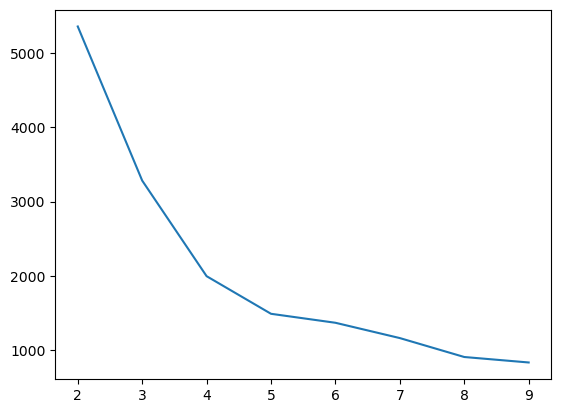

In [ ]:
# Elbow Method
clusters=list(range(2,10))
ssd=[]
for num_clusters in clusters:
    kmeans=KMeans(n_clusters=num_clusters,init='k-means++',max_iter=150,random_state=42)
    model_clus=kmeans.fit(df_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd)
plt.show()

In [ ]:
# Silhouette Score meothod
clusters=list(range(2,10))
silhouette=[]

for num_clusters in clusters:
    kmeans=KMeans(n_clusters=num_clusters,init='k-means++',max_iter=150,random_state=42)
    cluster=kmeans.fit_predict(df_df1)
    silhouette.append(silhouette_score(df_df1,cluster))
    print(f"for {num_clusters} the silhouette score is {silhouette_score(df_df1,cluster)}")


for 2 the silhouette score is 0.9566997142239224
for 3 the silhouette score is 0.9370940489293991
for 4 the silhouette score is 0.9079407145596485
for 5 the silhouette score is 0.8727198674801081
for 6 the silhouette score is 0.8512760362551186
for 7 the silhouette score is 0.8436396268955186
for 8 the silhouette score is 0.8432941354951928
for 9 the silhouette score is 0.8103529618041367


In [ ]:
best_k=clusters[np.argmax(silhouette)]
best_k

2

In [ ]:
cluster=4 #by elbow method and taking avg of silhouette score of clusters nos. 4,5 6
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=150,random_state=42)
kmeans.fit(df_df1)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df['Cluster id']=kmeans.labels_

In [ ]:
df['Cluster id'].value_counts()

Cluster id
0    7661
3     259
1      68
2      19
Name: count, dtype: int64

In [ ]:
cluster=5
clusters=KMeans(n_clusters=5,init='k-means++',max_iter=150,random_state=42)
clusters.fit(df_df1)
pred=clusters.predict(df_df1)
clusters.labels_

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
silhoutte_score_value=silhouette_score(df_df1,pred)

In [ ]:
df['Cluster id']=clusters.labels_

In [ ]:
df['Cluster id'].value_counts()

Cluster id
4    7391
0     440
3     109
1      49
2      18
Name: count, dtype: int64

In [ ]:
df.head()

,Material,Billed Quantity,invoice count,Material Description,Available stock,Cluster id
1,ACAIPIG060,0.0,0.0,Indicator Lamp( Misty),160.0,4
2,ACAKCXG063,0.0,0.0,6/16 A 3Pin Shuttered Socket ISI(Misty),59.0,4
3,ACAKGXG002,0.0,0.0,USB Charger 2.1 A Single Port( Misty),17.0,4
4,ACAKHWG000,0.0,0.0,Tel Socket 1M( Misty),63.0,4
5,ACAKHWG000,0.0,0.0,Tel Socket 1M( Misty),5.0,4


In [ ]:
df[df['Cluster id']==4].sort_values(by=['invoice count','Billed Quantity','Available stock'],ascending=[False,False,True]).head()# fast moving

,Material,Billed Quantity,invoice count,Material Description,Available stock,Cluster id
4639,GSCRBMGEX121,3.0,44.0,CH Jar Lid Gasket_Vento MG SP,155.0,4
3936,GSCELPLX0009,8.0,39.0,Thermostat Cista SP,160.0,4
3948,GSCELPLX0012,6.0,31.0,Heating Element Set Cista SP,204.0,4
2576,FSCPTMFPX207,4.0,31.0,FRONT COWL SPRINT LED REMOTE NEW SP,9.0,4
2577,FSCPTMFPX207,4.0,31.0,FRONT COWL SPRINT LED REMOTE NEW SP,45.0,4


In [ ]:
df[df['Cluster id']==0].sort_values(by=['invoice count','Billed Quantity','Available stock'],ascending=[False,False,True]) # non moving cluster

,Material,Billed Quantity,invoice count,Material Description,Available stock,Cluster id
3539,FSSFCX1182,1.0,217.0,STATOR ASSY 14X14X14 mm ES. 125 SHAFT SP,93.0,0
5751,GSSGNX0129,18.0,208.0,Jar Assy - Dry - w/o lid - Hydro MG SP,114.0,0
2745,FSCPTMFWX148,22.0,198.0,GEAR BOX ASSY WFM (DT40C.0.5) SP,129.0,0
5707,GSSGNX0049,38.0,195.0,Jar Assy - Chutney - W/o Lid - M G NV SP,133.0,0
4436,GSCPTMGEX733,18.0,163.0,DG Lid_Hydro SP,81.0,0
...,...,...,...,...,...,...
7456,LSCPTMLOX719,82.0,4.0,L.SPARE DIFFUSER S-0872 585X585X0.8 MM,51.0,0
2691,FSCPTMFTX242,127.0,3.0,KNUCKLE VELOCITY WHITE SP,116.0,0
2681,FSCPTMFTX237,119.0,2.0,BACK COWL LED WHITE SP,15.0,0
2682,FSCPTMFTX237,119.0,2.0,BACK COWL LED WHITE SP,76.0,0


In [ ]:
df[df['Cluster id']==3].sort_values(by=['invoice count','Billed Quantity','Available stock'],ascending=[False,False,True]).head() # semi moving cluster

,Material,Billed Quantity,invoice count,Material Description,Available stock,Cluster id
2811,FSSCRX2556,30.0,275.0,BLDC CONTROLLERLV_V3_MECHANICAL IVORY SP,162.0,3
2815,FSSCRX2557,44.0,274.0,BLDC CONTROLLERLV_V3_MECHANICAL BROWN SP,120.0,3
1854,FSCELZIX0062,303.0,242.0,PCB 1200 mm ENTICER BLDC SPARE,24.0,3
5325,GSSGEX0819,282.0,240.0,GENIE CHUTNEY JAR ASSY W/O LID,123.0,3
4690,GSCSMYWHC041,300.0,239.0,SPARE HEATING ELEMENT 2KW VRT 10L SNGPKT,123.0,3


In [ ]:
df[df['Cluster id']==1].sort_values(by=['invoice count','Billed Quantity','Available stock'],ascending=[False,False,True]).head()# fast moving

,Material,Billed Quantity,invoice count,Material Description,Available stock,Cluster id
5757,GSSGNX0130,566.0,494.0,Jar Assy - CH - w/o lid - Hydro MG SP,84.0,1
5755,GSSGNX0130,54.0,494.0,Jar Assy - CH - w/o lid - Hydro MG SP,84.0,1
3898,GSCELOLX0017,536.0,433.0,Motor - Aspro,52.0,1
4074,GSCELZIX0034,509.0,429.0,Power PCB _ICT TC-18,133.0,1
1599,FSCCPAFWX358,564.0,424.0,"Accelero 16""w/f HS MOTOR",128.0,1


In [ ]:
df.sort_values(by=['invoice count','Billed Quantity','Available stock'],ascending=[False,False,False])

,Material,Billed Quantity,invoice count,Material Description,Available stock,Cluster id
1802,FSCELOIX0001,1111.0,777.0,MOTOR(FM110209F)WBB 16H 100-130W 230V/50,160.0,2
1803,FSCELOIX0001,1111.0,777.0,MOTOR(FM110209F)WBB 16H 100-130W 230V/50,10.0,2
5994,GSSGVX0056,1005.0,712.0,PT Main PCB ( New Screw Type),133.0,2
1771,FSCELILX0162,1026.0,689.0,PCB 1200 mm BLDC BEMFFZA SPARE,209.0,2
6014,GSSGVX0159,827.0,669.0,INDC. COOKTOP RT QT MAIN PCB,123.0,2
...,...,...,...,...,...,...
8462,ZGSSHAX4697,0.0,0.0,Dummy IDU SAC 1.5 Ton AF 3 Star INV SL,1.0,4
8566,ZSHALI18010,0.0,0.0,Dummy - GLS18I55WBHL / GLS18V5FWGIL,1.0,4
8574,ZSHALI18233,0.0,0.0,DUMMY IDU GLS18I3FOSEC,1.0,4
8576,ZSHALI18332,0.0,0.0,DUMMY IDU - GLS18V5FWLGT,1.0,4


In [ ]:
df[df['Cluster id']==2].sort_values(by=['invoice count','Billed Quantity','Available stock'],ascending=[False,False,True])# highest moving

,Material,Billed Quantity,invoice count,Material Description,Available stock,Cluster id
1803,FSCELOIX0001,1111.0,777.0,MOTOR(FM110209F)WBB 16H 100-130W 230V/50,10.0,2
1802,FSCELOIX0001,1111.0,777.0,MOTOR(FM110209F)WBB 16H 100-130W 230V/50,160.0,2
5994,GSSGVX0056,1005.0,712.0,PT Main PCB ( New Screw Type),133.0,2
1771,FSCELILX0162,1026.0,689.0,PCB 1200 mm BLDC BEMFFZA SPARE,209.0,2
6015,GSSGVX0159,827.0,669.0,INDC. COOKTOP RT QT MAIN PCB,28.0,2
6014,GSSGVX0159,827.0,669.0,INDC. COOKTOP RT QT MAIN PCB,123.0,2
1278,FSCCPAFSX316,1069.0,629.0,500 WINDSTROM/OXY/NEO-POLE ASSLY,259.0,2
6038,GSSGVX0180,843.0,585.0,INDC. ST/ST-X MAIN PCB SMALL SIZE (NEW),15.0,2
4076,GSCELZIX0036,761.0,579.0,Power PCB _ICT TC-20,17.0,2
1761,FSCELILX0126,731.0,543.0,REMOTE FOR STEALTH BLDC RF,88.0,2


## Visualization of KMeans Cluster

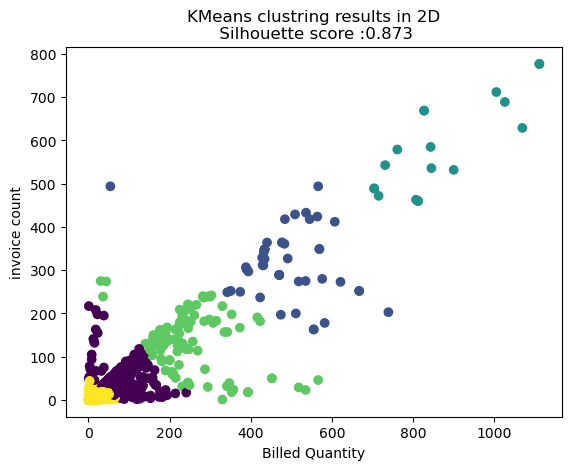

In [ ]:
# Visualization in 2D

plt.scatter(df.loc[:,'Billed Quantity'],df.loc[:,'invoice count'],c=pred,cmap='viridis')
plt.xlabel("Billed Quantity")
plt.ylabel("invoice count")
plt.title("KMeans clustring results in 2D\n Silhouette score :{0:.3f}".format(silhoutte_score_value))
plt.show()

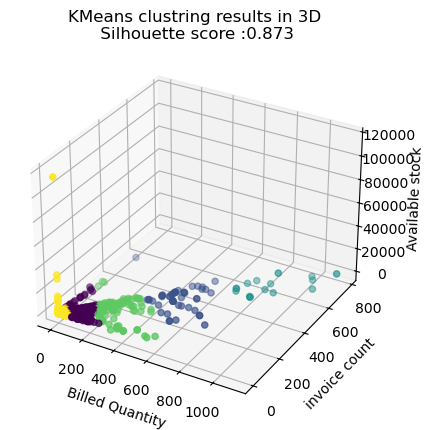

In [ ]:
# Visualisation in 3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Billed Quantity'],df['invoice count'],df['Available stock'],c=pred,cmap='viridis')
ax.set_xlabel('Billed Quantity')
ax.set_ylabel('invoice count')
ax.set_zlabel('Available stock')
ax.set_title("KMeans clustring results in 3D\n Silhouette score :{0:.3f}".format(silhoutte_score_value))
plt.show()

## Agglomerative Clustering

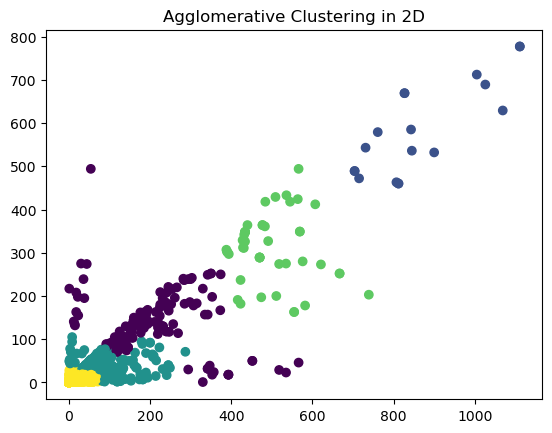

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

X=df_df1

# Fit the clustering model
agg_cluster=AgglomerativeClustering(n_clusters=5)
agg_cluster.fit(X)

# Plot in 2D
plt.scatter(df['Billed Quantity'],df['invoice count'],c=agg_cluster.labels_,cmap='viridis')
plt.title("Agglomerative Clustering in 2D")
plt.show()

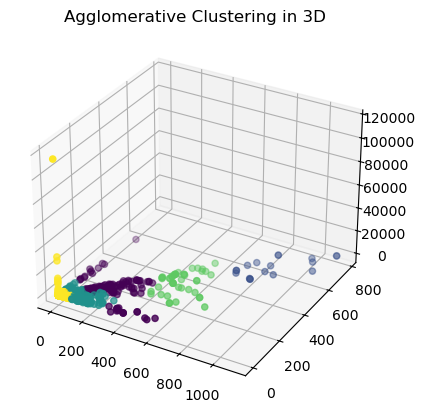

In [ ]:
# Plot in 2D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Billed Quantity'],df['invoice count'],df['Available stock'],c=agg_cluster.labels_,cmap='viridis')
ax.set_title("Agglomerative Clustering in 3D")
plt.show()

In [ ]:
df['agg_clusterid']=agg_cluster.labels_

In [ ]:
df['agg_clusterid'].value_counts()

agg_clusterid
4    7385
2     395
0     163
3      46
1      18
Name: count, dtype: int64

## Dendrogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (10, 7))
plt.title('Dendrogram')
link = linkage(X, method = 'ward')
dend = dendrogram(link)

## As data size is too large dendrogram has crossed the limit so error showing . we can set the recursion uppper limit but that may lead to chance of crash

RecursionError: maximum recursion depth exceeded

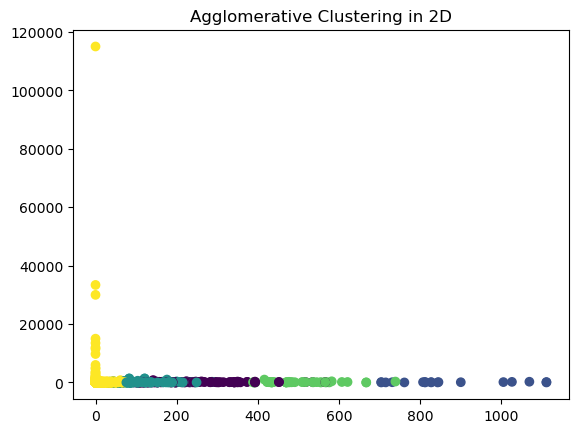

In [ ]:
# Plot in 2D
plt.scatter(df['Billed Quantity'],df['Available stock'],c=agg_cluster.labels_,cmap='viridis')
plt.title("Agglomerative Clustering in 2D")
plt.show()

In [ ]:
df.head()

,Material,Billed Quantity,invoice count,Material Description,Available stock,Cluster id,agg_clusterid
1,ACAIPIG060,0.0,0.0,Indicator Lamp( Misty),160.0,4,4
2,ACAKCXG063,0.0,0.0,6/16 A 3Pin Shuttered Socket ISI(Misty),59.0,4,4
3,ACAKGXG002,0.0,0.0,USB Charger 2.1 A Single Port( Misty),17.0,4,4
4,ACAKHWG000,0.0,0.0,Tel Socket 1M( Misty),63.0,4,4
5,ACAKHWG000,0.0,0.0,Tel Socket 1M( Misty),5.0,4,4
